In [1]:
import load_files as lf
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
flow_data_DRU, level_data_DRU = lf.get_measurements("D:/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/RG8150/RG8150")
rain_data = lf.get_rain("D:/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_timeseries")
data = lf.sdf("D:/waterschap-aa-en-maas_sewage_2019/sewer_model/aa-en-maas_sewer_shp")

In [3]:
class measurement_analysis:
    def __init__(self, flow_data, level_data, rain_data):
        # CLEAN DATA
        # Check wether data has right format and if not make necessary transformations
        
        # Transform TimeStamp column to datetime
        if flow_data["TimeStamp"].dtype != "<M8[ns]":
            flow_data["TimeStamp"] = pd.to_datetime(flow_data["TimeStamp"])
            
        flow_data = flow_data.loc[flow_data["DataQuality"] != 0]
        flow_data.sort_values("TimeStamp", inplace=True)
        flow_data.reset_index(drop=True, inplace=True)
        
        if level_data["TimeStamp"].dtype != "<M8[ns]":
            level_data["TimeStamp"] = pd.to_datetime(level_data["TimeStamp"])
        
        level_data = level_data.loc[level_data["DataQuality"] != 0]
        level_data.sort_values("TimeStamp", inplace=True)
        level_data.reset_index(drop=True, inplace=True)
        
        if rain_data["Start"].dtype != "<M8[ns]":
            rain_data["Start"] = pd.to_datetime(rain_data["Start"])
            
        rain_data.sort_values("Start", inplace=True)
        rain_data.reset_index(drop=True, inplace=True)
        
        # STORE DATA
        self.flow_data = flow_data
        self.level_data = level_data
        self.rain_data = rain_data
    
    def analyze(self, area_data=None, village_code=None):
        
        if village_code is not None:
            area_data["village_ID"] = area_data["sewer_system"].str.slice(4,7)
            area_data = area_data.loc[area_data["village_ID"] == village_code]
            areas = area_data["area_name"][area_data["area_name"].apply(lambda i: i in self.rain_data.columns)].to_list()
        
            self.rain_data = self.rain_data.loc[:, ["Start", "End"] + areas]
        
        self.rain_data["Date"] = self.rain_data["Start"].apply(lambda i: i.date())
        self.flow_data["Date"] = self.flow_data["TimeStamp"].apply(lambda i: i.date())
        self.level_data["Date"] = self.level_data["TimeStamp"].apply(lambda i: i.date())
        
        self.rain_data["Hour"] = self.rain_data["Start"].apply(lambda i: i.hour)
        self.flow_data["Hour"] = self.flow_data["TimeStamp"].apply(lambda i: i.hour)
        self.level_data["Hour"] = self.level_data["TimeStamp"].apply(lambda i: i.hour)
        
        
        self.flow_data["TimeSpan"] = self.flow_data["TimeStamp"].diff(1).apply(lambda i: i.seconds).fillna(5)
        self.level_data["TimeSpan"] = self.level_data["TimeStamp"].diff(1).apply(lambda i: i.seconds)
        
        self.flow_data["Flow"] = self.flow_data["Value"] * self.flow_data["TimeSpan"] / 3600
        
        flow_summary = self.flow_data.groupby(["Date", "Hour"])["Flow"].sum().reset_index(drop=False)
        flow_summary["Weekday"] = x["Date"].apply(lambda i: int(i.weekday() >= 5))
        flow_summary["nvals"] = self.flow_data.groupby(["Date", "Hour"])["Flow"].count().reset_index(drop=True)
        rain_summary = self.rain_data.iloc[:, 2:].groupby(["Date", "Hour"]).agg("sum").reset_index(drop=False)
        
        self.village_code = village_code
        self.area_data = area_data
        
        #self.flow_data = self.flow_data
        
        return flow_summary, rain_summary

In [4]:
df = measurement_analysis(flow_data_DRU, level_data_DRU, rain_data)

In [5]:
x, y= df.analyze(data.area_data, "DRU")

In [15]:
x["Weekday"] = x["Date"].apply(lambda i: int(i.weekday() >= 5))

In [18]:
haha = pd.merge(x, y, on=["Date", "Hour"])

In [20]:
haha = haha[haha["nvals"] >= 100]

In [22]:
haha.to_csv("heya_lm.csv")

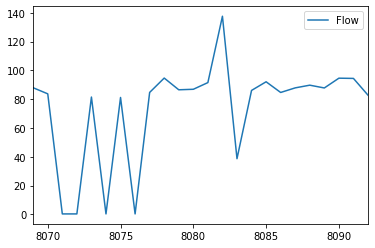

In [148]:
hey.loc[hey["Date"] == pd.to_datetime("2019-1-7").date(), ["Flow"]].plot()

In [158]:
z.iloc[:, 2:].groupby(["Date", "hour"]).agg("sum").reset_index(drop=False)

,Date,hour,Kastanjelaan,Sportlaan/Hoge Schijf,Groenewoud,Beethovenlaan/Venne West,Stationsstraat-zuid,Dillenburg,Sapa,Stationsstraat-noord,Bosscheweg,Woonwagencentrum,Gemeentewerf
0,2017-12-31,23,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2018-01-01,0,0.0000,0.0000,0.0052,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2018-01-01,1,0.0597,0.0212,0.0140,0.0516,0.0451,0.0214,0.0141,0.0436,0.0000,0.0210,0.0210
3,2018-01-01,2,0.0002,0.0504,0.0000,0.0142,0.0006,0.0001,0.0000,0.0000,0.0000,0.0503,0.0461
4,2018-01-01,3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,2018-01-01,4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,2018-01-01,5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,2018-01-01,6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,2018-01-01,7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,2018-01-01,8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


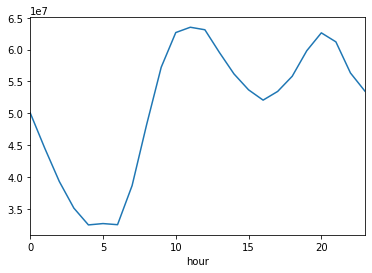

In [74]:
haha.groupby("hour")["Value"].sum().plot()

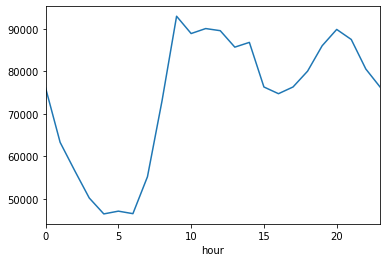

In [77]:
haha.groupby("hour")["Flow"].sum().plot()